In [ ]:
"""
Purpose: To generate the list of neurons that are viable for 
one-shot axon extension


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-09 17:47:09,357 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-09 17:47:09,359 - settings - Setting database.user to celiib
INFO - 2021-03-09 17:47:09,359 - settings - Setting database.password to newceliipass
INFO - 2021-03-09 17:47:09,368 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-09 17:47:09,369 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-09 17:47:09,382 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-09 17:47:09,806 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-09 17:47:09,810 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-09 17:47:09,811 - settings - Setting database.user to celiib
INFO - 2021-03-09 17:47:09,812 - settings - Setting database.password to newceliipass
INFO - 2021-03-09 17:47:09,813 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-09 17:47:09,814 - settings - Setting database.user to celiib
INFO - 2021-03-09 17:47:09,815 - settings - Setting database.password to newceliipass
INFO - 2021-03-09 17:47:09,816 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-09 17:47:10,259 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-09 17:47:10,301 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-09 17:47:10,303 - settings - Setting database.user to celiib
INFO - 2021-03-09 17:47:10,304 - settings - Setting database.pa

In [4]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

In [29]:
# minnie.AutoProofreadNeurons3() & "spine_category='densely_spined' AND axon_length<10 AND skeletal_length > 1000000"

In [30]:
# (minnie.AutoProofreadNeurons3() 
# & "spine_category='densely_spined' AND axon_length<10 AND skeletal_length > 10000 AND n_apicals>0"
#  & (minnie.Decomposition() & "n_error_limbs=0").proj())

In [31]:
# (minnie.AutoProofreadNeurons3() 
# & "spine_category='densely_spined' AND axon_length<10 AND skeletal_length > 1000000"
#  & (minnie.Decomposition() & "n_error_limbs=0").proj()).proj("spine_density")

In [114]:
import datajoint as dj

@schema
class OneShotNeurons(dj.Manual):
    definition="""
    segment_id           : bigint unsigned              # segment id for those to be decimated
    -> minnie.AutoProofreadVersion 
    """

curr_table = (minnie.AutoProofreadNeurons3() 
& "spine_category='densely_spined' AND axon_length<10 AND skeletal_length > 1000000"
 & (minnie.Decomposition() & "n_error_limbs=0").proj()).proj()

segment_id_one_shots,proof_version_one_shot = curr_table.fetch("segment_id","proof_version")
dict_to_write = [dict(segment_id=k,proof_version=v) for k,v in zip(segment_id_one_shots,
                                                proof_version_one_shot)]
OneShotNeurons.insert(dict_to_write,skip_duplicates=True)

# Investigating Axon Errors

In [15]:
neuron_obj = (minnie.Decomposition() & "segment_id=864691134917429258").fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [16]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [17]:
import classification_utils as clu


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L0 because was the limb in the first key


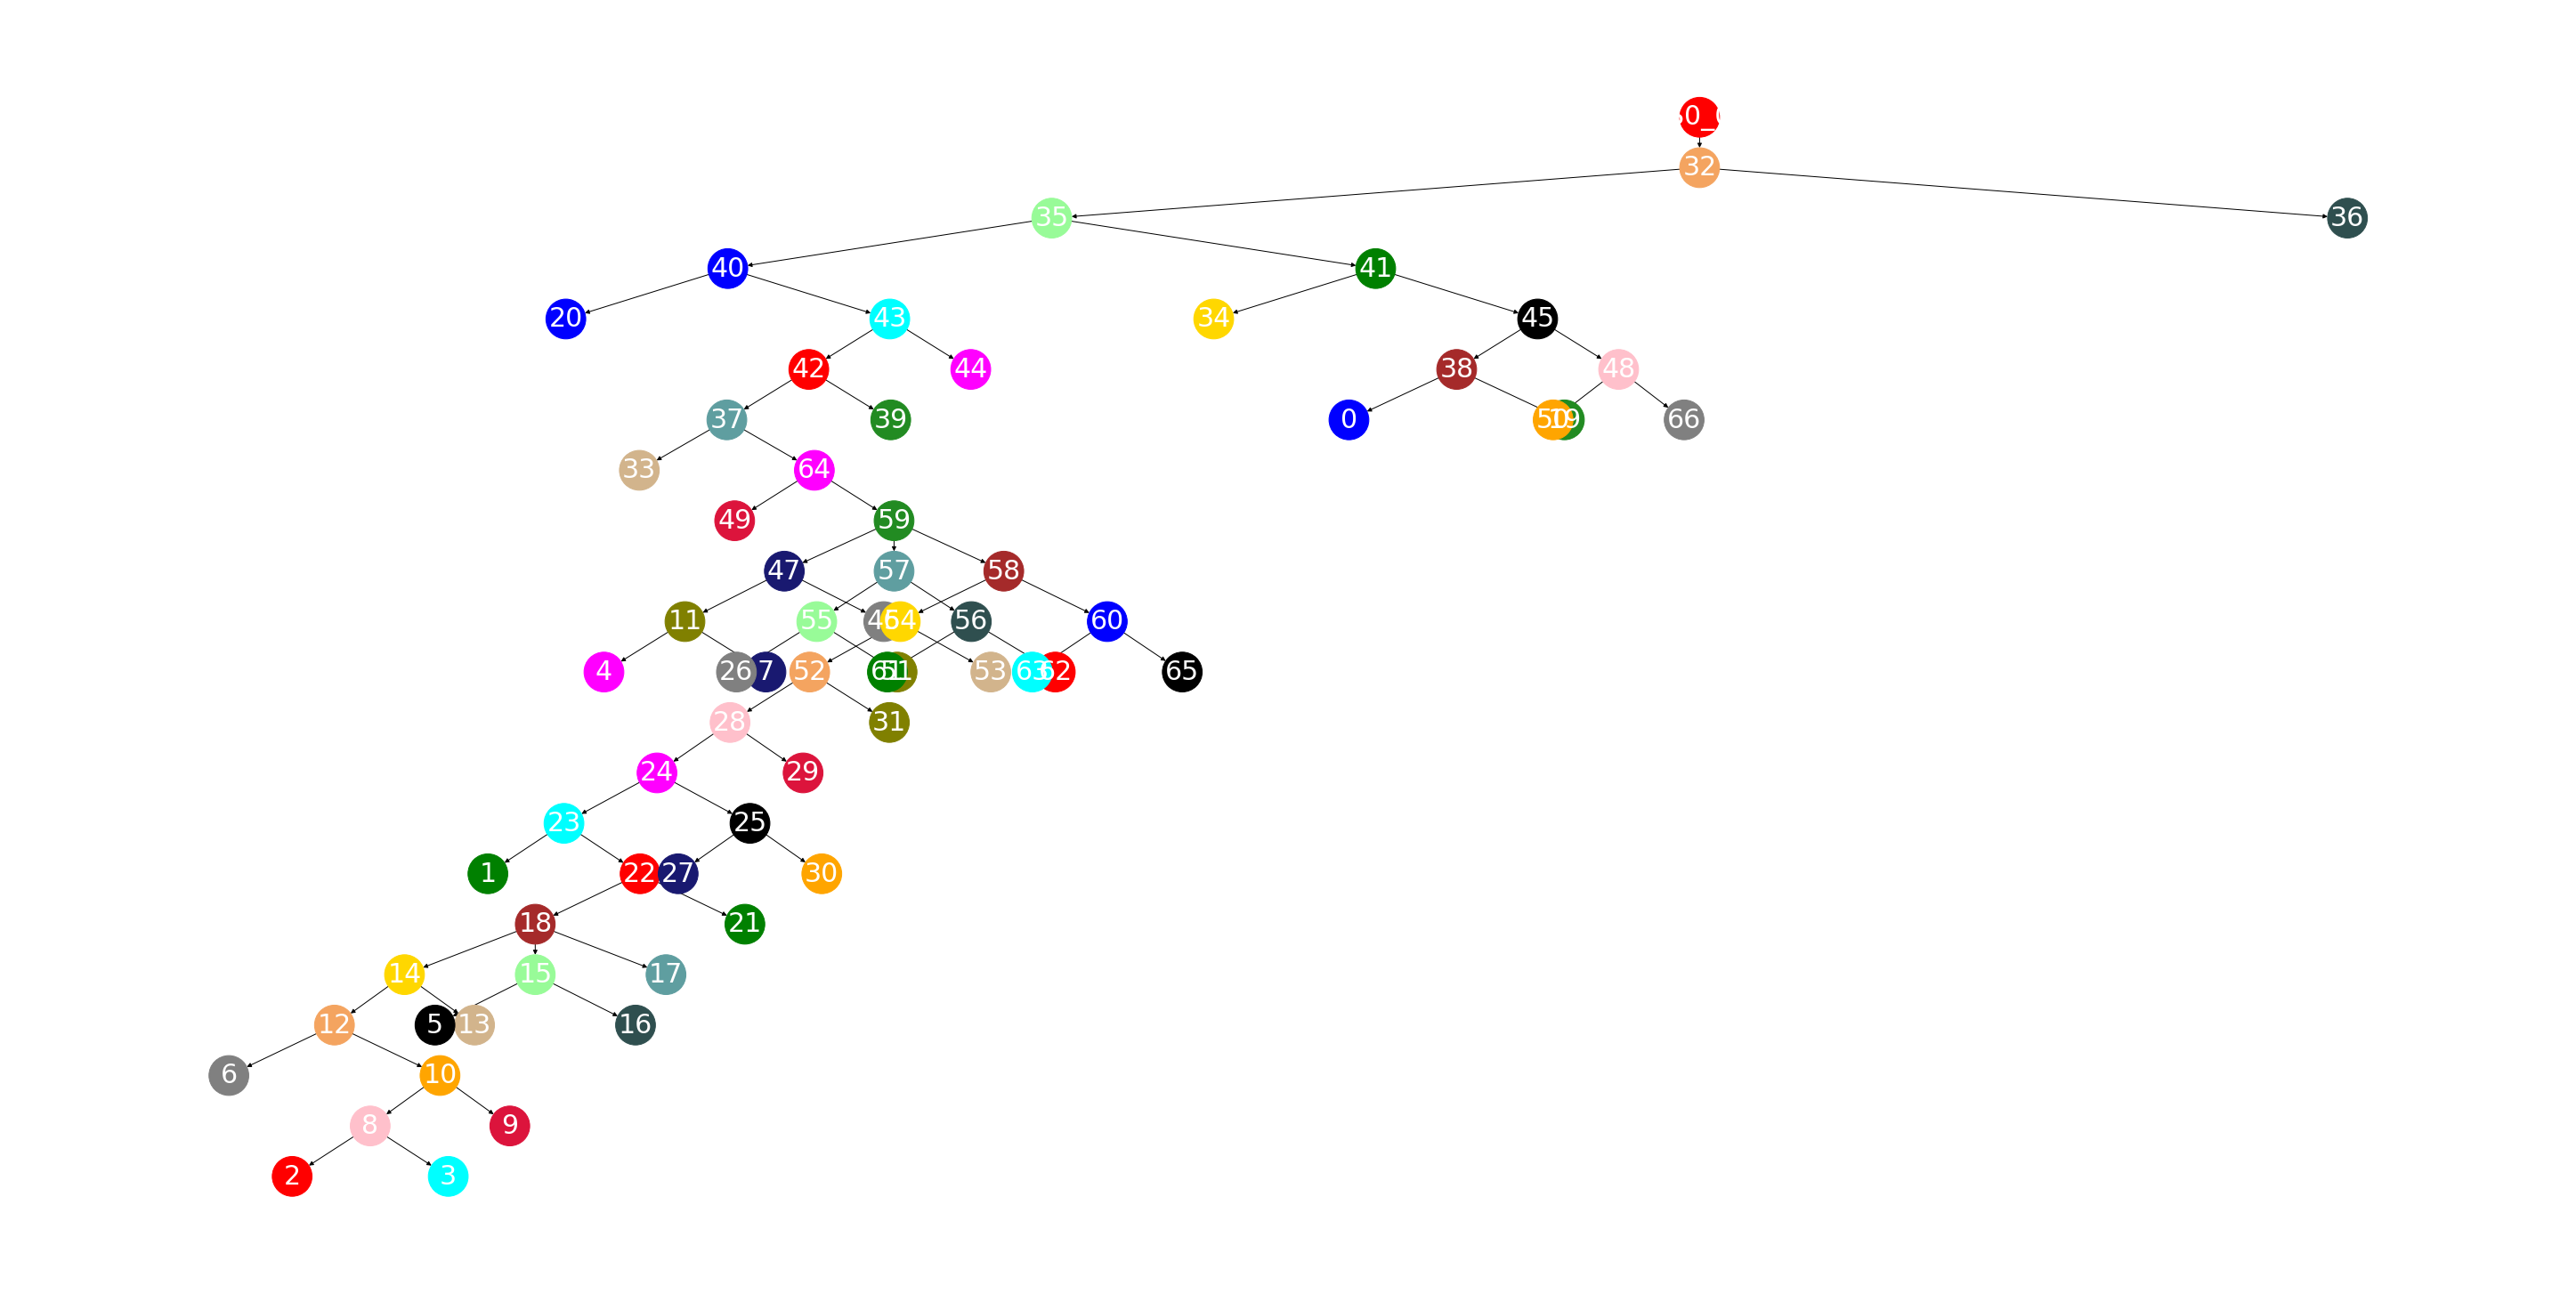

In [21]:
nviz.visualize_neuron_specific_limb(neuron_obj,0
                                   )

In [33]:
curr_branch = neuron_obj[0][32]
curr_branch.width,curr_branch.n_spines,curr_branch.skeletal_length

(308.0361062959539, 0, 35224.72132856008)

In [35]:
clu.axon_like_limb_branch_dict(neuron_obj,
                              downstream_face_threshold=3000,
                                width_match_threshold=50,
                               downstream_non_axon_percentage_threshold=0.3,
                               distance_for_downstream_check=90000,
                               max_skeletal_length_can_flip=70000,
                              include_ais=True,
                              plot_axon_like=True,
                              verbose=True)

downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 90000
Skipping a possible flip because the length is too long for threshold (70000): 226420.19116203225
Soma 0, limb L0, node 1 did not hae any downstream targets
Soma 0, limb L0, node 2 did not hae any downstream targets
Soma 0, limb L0, node 3 did not hae any downstream targets
Soma 0, limb L0, node 4 did not hae any downstream targets
Soma 0, limb L0, node 5 did not hae any downstream targets
Soma 0, limb L0, node 6 did not hae any downstream targets
Soma 0, limb L0, node 7 did not hae any downstream targets
Soma 0, limb L0, node 8 did not hae any NON-AXON downstream targets
Soma 0, limb L0, node 9 did not hae any downstream targets
Soma 0, limb L0, node 10 did not hae any NON-AXON downstream targets
Soma 0, limb L0, node 11 did not hae any NON-AXON downstream targets
Soma 0, limb L0, node 12 did not hae any NON-AXON downstream targets
S

downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 90000
Soma 0, limb L1, node 3 had 104571 non-axon downstream faces, 0.0 axon downstream for a percentage of 1.0
perc_non_axon for limb_L1_node_3,  = 1.0
     Added 3 to non-axon list
total_non_axon_nodes = {3}
total_non_axon_nodes = set()
downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 90000
total_non_axon_nodes = set()
downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 90000
total_non_axon_nodes = set()
downstream_face_threshold= 3000
downstream_non_axon_percentage_threshold = 0.3
max_skeletal_length_can_flip = 70000
distance_for_downstream_check = 90000
Soma 0, limb L4, node 2 had 60823 non-axon downstream faces, 0.0 axon downstream for a percen

{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36,
        37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])}

In [36]:
import neuron_utils as nru

In [37]:
[k for k in dir(nru) if "starting" in k]

['all_soma_connnecting_endpionts_from_starting_info',
 'all_starting_attr_by_limb_and_soma',
 'all_starting_dicts_by_soma',
 'closest_branch_endpoint_to_limb_starting_coordinate',
 'get_starting_info_from_concept_network',
 'viable_axon_limbs_by_starting_angle',
 'viable_axon_limbs_by_starting_angle_old']

In [ ]:
"""
Get the soma starting angle for a limb by the 
"""

In [ ]:
import neuron_statistics as nst
curr_soma_angle = nst.soma_starting_angle(limb_obj=curr_limb,
                    )

if print_flag:
    print(f"Limb {limb_name} soma angle: {curr_soma_angle} ")

In [46]:
curr_limb = neuron_obj[0]

In [55]:
minnie.Decomposition()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134221889045,0,0.25,30.00,5,0,1,=BLOB=,12285,26788,0,1,1,0,1,1,3,3,7497.255110138911,7497.255110138911,942.191,298.182,298.182,1077.139,1077.139,1,0.00013338214924121366,0.3333333333333333,7497.255,3,0.00013338215120067278,0.333,55229792.033337906,55229792.033337906,7366.66836355187,7366.668471772389,18409930.677779302,16.8753
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167


In [56]:
import networkx_utils as xu

In [58]:
xu.upstream_node(neuron_obj[0].concept_network_directional,32)

In [101]:
import numpy_utils as nu
def limb_branch_skeleton_angle(limb_obj,
    branch_idx,
    soma_idx = None,
    soma_group_idx = None,
    plot_aligned_skeleton = False,
    restrict_skeleton_distance_threshold = 5000,
    plot_aligned_restricted_skeleton = False ,
    plot_with_limb_mesh=False,
    verbose = True,
    ):
    """
    Purpose: To get the angle of the branch of a skeleton
    in the current direcitonal concept network

    Pseudocode: 
    1) Set the concept network directional if soma_idx or soma_group set
    2) Get the upstream node of the branch
    3) Finding the starting endpoint
    3a) if upstream node is None --> use the current starting coordinate
    3b) if upstream node is not None --> find the common endpoint
    4) Restrict skeleton to a threshold distance
    5) Reduce the skeleton to a vector
    6) Find the angle of this vector with the top of the volume
    """
    #1) Set the concept network directional if soma_idx or soma_group set
    if soma_idx is not None:
        limb_obj.set_concept_network_directional(soma_group_idx=soma_group_idx)

    #2) Get the upstream node of the branch
    upstream_branch = xu.upstream_node(neuron_obj[0].concept_network_directional,branch_idx)
    if verbose:
        print(f"upstream_branch = {upstream_branch}")

    # 3) Finding the starting endpoint
    # 3a) if upstream node is None --> use the current starting coordinate
    # 3b) if upstream node is not None --> find the common endpoint

    curr_branch = limb_obj[branch_idx]

    if upstream_branch is None:
        if verbose:
            print("branch is the starting branch")
        starting_endpoint = limb_obj.current_starting_coordinate
        ordered_sk = sk.order_skeleton(curr_branch.skeleton,start_endpoint_coordinate=starting_endpoint)
    else:
        if verbose:
            print("branch is the downstream branch")
        ordered_sk,_ = sk.align_skeletons_at_connectivity(curr_branch.skeleton,limb_obj[upstream_branch].skeleton)

        
    if plot_with_limb_mesh:
        meshes = [limb_obj.mesh]
        meshes_colors= ["blue"]
    else:
        meshes = None
        meshes_colors = None
        
    if plot_aligned_skeleton:
        nviz.plot_objects(curr_branch.mesh,
                          meshes=meshes,
                          meshes_colors=meshes_colors,
                     skeletons=[ordered_sk],
                     scatters=[ordered_sk[0][0]],
                         scatter_size=2)

    restr_sk = sk.restrict_skeleton_from_start(ordered_sk,
                cutoff_distance=restrict_skeleton_distance_threshold)[0]

    if plot_aligned_restricted_skeleton:
        nviz.plot_objects(curr_branch.mesh,
                          meshes=meshes,
                          meshes_colors=meshes_colors,
                     skeletons=[restr_sk],
                     scatters=[restr_sk[0][0]],
                         scatter_size=2)

    sk_vector = np.array(restr_sk[-1][-1]-restr_sk[0][0])

    sk_angle = nu.angle_between_vectors(np.array([0,-1,0]),sk_vector)
    if verbose:
        print(f"sk_angle = {sk_angle}")

    return sk_angle

limb_branch_skeleton_angle(limb_obj = curr_limb,
    branch_idx = 15,
    soma_idx = None,
    soma_group_idx = None,
    plot_aligned_skeleton = True,
    restrict_skeleton_distance_threshold = 5000,
    plot_aligned_restricted_skeleton = True ,
                           plot_with_limb_mesh=True,
    verbose = True,
    )

upstream_branch = 18
branch is the downstream branch


AttributeError: 'numpy.ndarray' object has no attribute 'vertices'

In [102]:
debug

> /meshAfterParty/meshAfterParty/neuron_visualizations.py(1825)plot_objects()
   1823         main_mesh_faces= []
   1824     else:
-> 1825         main_mesh_verts = main_mesh.vertices
   1826         main_mesh_faces= main_mesh.faces
   1827 

ipdb> u
> <ipython-input-101-a3d617d2e420>(65)limb_branch_skeleton_angle()
     63                      skeletons=[ordered_sk],
     64                      scatters=[ordered_sk[0][0]],
---> 65                          scatter_size=2)
     66 
     67     restr_sk = sk.restrict_skeleton_from_start(ordered_sk,

ipdb> curr_branch.mesh
<trimesh.Trimesh(vertices.shape=(951, 3), faces.shape=(1871, 3))>
ipdb> [limb_obj.mesh]
[<trimesh.Trimesh(vertices.shape=(118655, 3), faces.shape=(236115, 3))>]
ipdb> d
> /meshAfterParty/meshAfterParty/neuron_visualizations.py(1825)plot_objects()
   1823         main_mesh_faces= []
   1824     else:
-> 1825         main_mesh_verts = main_mesh.vertices
   1826         main_mesh_faces= main_mesh.faces
   1827 

ipdb> ma

In [76]:
nviz.plot_objects(curr_branch.mesh,
                 skeletons=[ordered_sk],
                 scatters=[ordered_sk[0][0]])

In [71]:
upstream_branch = xu.upstream_node(neuron_obj[0].concept_network_directional,15)
upstream_branch

18

In [54]:


neuron_obj[0][32].skeleton

array([[[1013245.88223849,  679135.34489458,  880946.84149341],
        [1013201.84961843,  679046.02251791,  880938.23164118]],

       [[1013245.88223849,  679135.34489458,  880946.84149341],
        [1013289.3931982 ,  679225.14745902,  880953.34501594]],

       [[1013289.3931982 ,  679225.14745902,  880953.34501594],
        [1013331.52068545,  679315.72058865,  880957.07588761]],

       ...,

       [[1013066.59593451,  678782.15388496,  880893.52541187],
        [1013111.86681246,  678869.45402511,  880911.67019464]],

       [[1013111.86681246,  678869.45402511,  880911.67019464],
        [1013156.91803299,  678957.52763791,  880925.99199895]],

       [[1013156.91803299,  678957.52763791,  880925.99199895],
        [1013201.84961843,  679046.02251791,  880938.23164118]]])

In [53]:
nru.get_limb_starting_angle_dict(neuron_obj = neuron_obj)

{0: {0: {0: 158.26}},
 1: {0: {0: 23.57}},
 2: {0: {0: 94.94}},
 3: {0: {0: 63.94}},
 4: {0: {0: 64.71}},
 5: {0: {0: 118.35}},
 6: {0: {0: 62.06}},
 7: {0: {0: 59.5}}}

In [48]:
curr_limb.all_concept_network_data

[{'starting_soma': 0,
  'starting_node': 32,
  'starting_endpoints': array([[1006794.20944927,  654567.77329656,  877229.95755835],
         [1015436.39326243,  687704.70158706,  881502.65139429]]),
  'starting_coordinate': array([1006794.20944927,  654567.77329656,  877229.95755835]),
  'touching_soma_vertices': TrackedArray([[1006714. ,  654239.2,  876615.6],
                [1006776. ,  654184.1,  876785.8],
                [1006599. ,  654208.6,  877377.6],
                [1006107. ,  654552.4,  876855.6],
                [1006371. ,  654590.9,  876214.2],
                [1006291. ,  654323.6,  877185.5],
                [1006692. ,  653951.3,  877232.4],
                [1006672. ,  654555.4,  876464.4],
                [1006434. ,  654244. ,  877380.8],
                [1006086. ,  654657.1,  876703.4],
                [1006195. ,  654574.9,  876287.9],
                [1006046. ,  654427.8,  876501.8],
                [1006190. ,  654450.3,  877020.1],
                [1006778

In [47]:
import neuron_statistics as nst
curr_limb
nst.soma_starting_angle(curr_limb,
                        neuron_obj=neuron_obj,
                       soma_idx=0,
                       soma_group_idx=0)

158.26

In [23]:
clu.axon_classification(neuron_obj,
                        plot_axon_like_segments=True,
                       plot_candidates=False,
                       verbose=True)


 Working on visualization type: mesh



Part 1: Axon like branchese 
{'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])}
Limb L0 soma angle: 158.26 
Limb L1 soma angle: 23.57 
Limb L2 soma angle: 94.94 
Limb L3 soma angle: 63.94 
Limb L4 soma angle: 64.71 
Limb L5 soma angle: 118.35 
Limb L6 soma angle: 62.06 
Limb L7 soma angle: 59.5 

Part 2: possible_axon_limbs = [0, 2, 5]

Phase 2: Working on Limb L0
nodes_to_eliminate = []

Phase 2: Working on Limb L2
nodes_to_eliminate = [3]

Phase 2: Working on Limb L5
nodes_to_eliminate = [4]

----Working on Limb L0-----
No nodes were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L5-----
No endpoints were eliminated so don't n

({},
 {'L0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 37,
         38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57,
         58, 59, 60, 61, 62, 63, 65, 66])})

# Creating the table

In [104]:
minnie.AllenProofreading.describe()

segment_id           : bigint unsigned              # segment id for those to be decimated
month                : tinyint                      # the month that the cell was added
day                  : tinyint                      # the day that the cell was added
year                 : int unsigned                 # the year that the cell was added
---
n_somas              : int                          # the number of somas associated with the neuron from the Allen Institute



'segment_id           : bigint unsigned              # segment id for those to be decimated\nmonth                : tinyint                      # the month that the cell was added\nday                  : tinyint                      # the day that the cell was added\nyear                 : int unsigned                 # the year that the cell was added\n---\nn_somas              : int                          # the number of somas associated with the neuron from the Allen Institute\n'

In [106]:
minnie.AutoProofreadNeurons3.describe()

-> minnie.Decomposition
split_index          : tinyint unsigned             # the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM
-> minnie.AutoProofreadVersion
---
multiplicity         : tinyint unsigned             # the total number of neurons that came from the parent segment id
cell_type_predicted  : enum('excitatory','inhibitory','other','unknown') # morphology predicted by classifier
spine_category       : enum('no_spined','sparsely_spined','densely_spined') 
n_axons              : tinyint unsigned             # Number of axon candidates identified
n_apicals            : tinyint unsigned             # Number of apicals identified
axon_length          : double                       # length (in um) of the classified axon skeleton
axon_area            : double                       # # area (in um^2) of the classified axon
nucleus_id           : int unsigned                 # id of nucleus from the flat segmentation  Equivalent to Allen: 'id'.
nuclei_distanc

"-> minnie.Decomposition\nsplit_index          : tinyint unsigned             # the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM\n-> minnie.AutoProofreadVersion\n---\nmultiplicity         : tinyint unsigned             # the total number of neurons that came from the parent segment id\ncell_type_predicted  : enum('excitatory','inhibitory','other','unknown') # morphology predicted by classifier\nspine_category       : enum('no_spined','sparsely_spined','densely_spined') \nn_axons              : tinyint unsigned             # Number of axon candidates identified\nn_apicals            : tinyint unsigned             # Number of apicals identified\naxon_length          : double                       # length (in um) of the classified axon skeleton\naxon_area            : double                       # # area (in um^2) of the classified axon\nnucleus_id           : int unsigned                 # id of nucleus from the flat segmentation  Equivalent to Allen: 'id'.\nn